In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
path = 'data_for_ariam/'
tickers = ['AAPL', 'KO', 'NVDA', 'PFE', 'TSLA']
# 第一步：读取数据
all_df = {}
for i in range(5):
    df = pd.read_csv(path+tickers[i]+'.csv', encoding='utf-8', index_col=0, parse_dates=True)
    print(df.head(5))
    all_df[tickers[i]]=df
all_df

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-12-13  113.839996  115.919998  113.750000  115.190002  112.414291   
2016-12-14  115.040001  116.199997  114.980003  115.190002  112.414291   
2016-12-15  115.379997  116.730003  115.230003  115.820000  113.029114   
2016-12-16  116.470001  116.500000  115.644997  115.970001  113.175484   
2016-12-19  115.800003  117.379997  115.750000  116.639999  113.829353   

              Volume  
Date                  
2016-12-13  43733811  
2016-12-14  34031834  
2016-12-15  46524544  
2016-12-16  44351134  
2016-12-19  27779423  
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2016-12-13  41.720001  41.959999  41.540001  41.759998  35.480404  18982161
2016-12-14  41.889999  41.990002  41.060001  41.209999  35.013107  17936291
2016-12-15  41.0

{'AAPL':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2016-12-13  113.839996  115.919998  113.750000  115.190002  112.414291   
 2016-12-14  115.040001  116.199997  114.980003  115.190002  112.414291   
 2016-12-15  115.379997  116.730003  115.230003  115.820000  113.029114   
 2016-12-16  116.470001  116.500000  115.644997  115.970001  113.175484   
 2016-12-19  115.800003  117.379997  115.750000  116.639999  113.829353   
 ...                ...         ...         ...         ...         ...   
 2021-12-06  164.289993  167.879898  164.279999  165.320007  165.320007   
 2021-12-07  169.080002  171.580002  168.339996  171.179993  171.179993   
 2021-12-08  172.125000  175.960007  170.699997  175.080002  175.080002   
 2021-12-09  174.910004  176.750000  173.919998  174.559998  174.559998   
 2021-12-10  175.205002  179.630005  174.690002  179.449997  179.449997   
 
               

In [2]:
all_data = {}
for i in range(5):
    all_data[tickers[i]] = all_df[tickers[i]]['Close']
all_data

{'AAPL': Date
 2016-12-13    115.190002
 2016-12-14    115.190002
 2016-12-15    115.820000
 2016-12-16    115.970001
 2016-12-19    116.639999
                  ...    
 2021-12-06    165.320007
 2021-12-07    171.179993
 2021-12-08    175.080002
 2021-12-09    174.559998
 2021-12-10    179.449997
 Name: Close, Length: 1258, dtype: float64,
 'KO': Date
 2016-12-13    41.759998
 2016-12-14    41.209999
 2016-12-15    41.549999
 2016-12-16    41.740002
 2016-12-19    41.669998
                 ...    
 2021-12-06    54.910000
 2021-12-07    55.209999
 2021-12-08    55.000000
 2021-12-09    54.860001
 2021-12-10    56.279999
 Name: Close, Length: 1258, dtype: float64,
 'NVDA': Date
 2016-12-13     22.792500
 2016-12-14     24.112499
 2016-12-15     24.677500
 2016-12-16     25.102501
 2016-12-19     25.407499
                  ...    
 2021-12-06    300.369995
 2021-12-07    324.269989
 2021-12-08    318.260010
 2021-12-09    304.899994
 2021-12-10    301.980011
 Name: Close, Length: 125

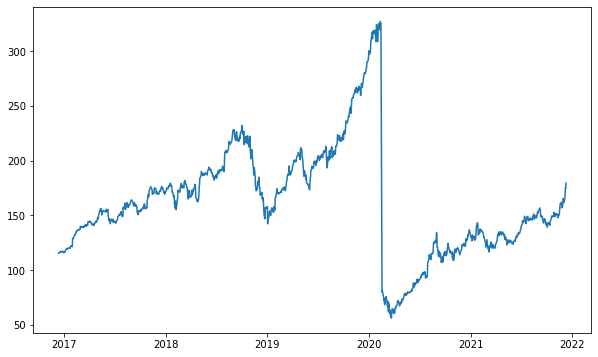

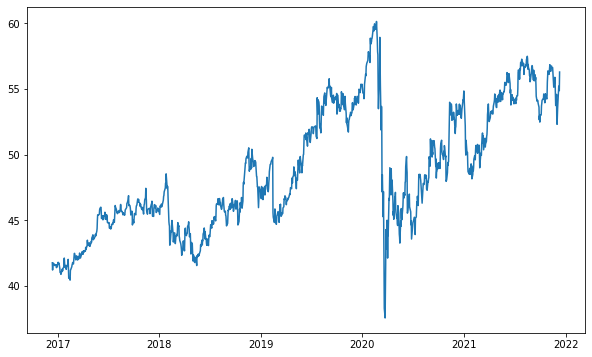

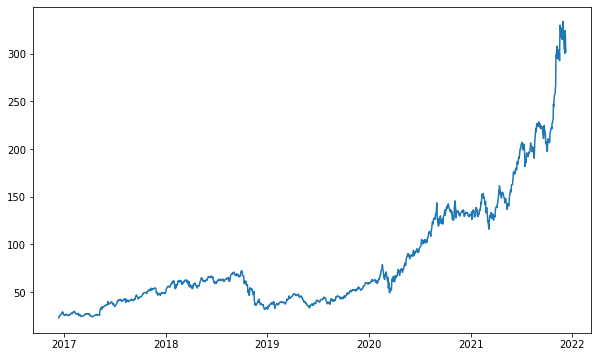

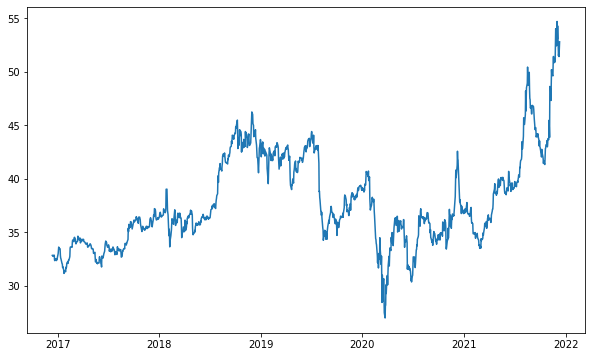

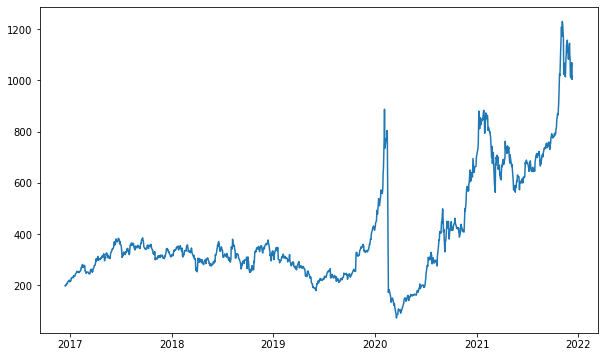

In [3]:
for i in range(5):
    plt.figure(figsize = (10, 6))
    plt.plot(all_df[tickers[i]].index, all_data[tickers[i]])
    plt.show()

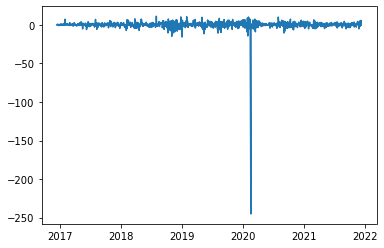

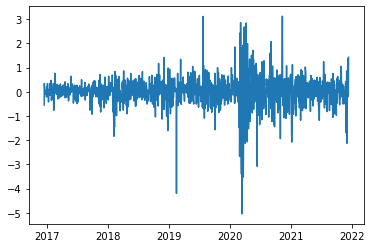

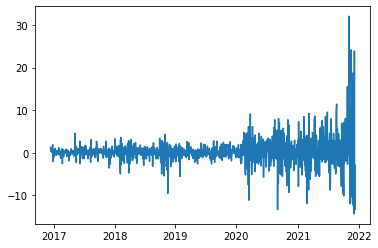

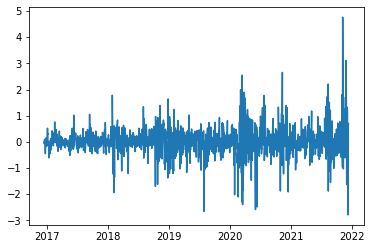

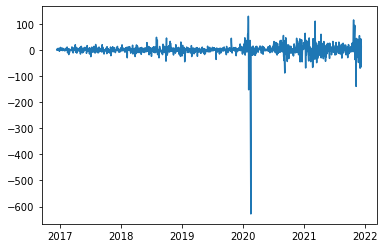

In [4]:
all_data_diff = {}
for i in range(5):
    data_diff = all_data[tickers[i]].diff()
    data_diff = data_diff.dropna()
    all_data_diff[tickers[i]] = data_diff
    plt.plot(data_diff)
    plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller
for i in range(5):
    print(tickers[i])
    print(adfuller(all_data_diff[tickers[i]]))

AAPL
(-35.677494604394305, 0.0, 0, 1256, {'1%': -3.4355671297788666, '5%': -2.8638438984080117, '10%': -2.5679966213893057}, 8483.236129828874)
KO
(-10.83093175308001, 1.708907992781434e-19, 11, 1245, {'1%': -3.4356133204636095, '5%': -2.8638642784217305, '10%': -2.5680074748794373}, 2285.0753432688334)
NVDA
(-7.540977839665778, 3.3788401717804945e-11, 18, 1238, {'1%': -3.4356431428057386, '5%': -2.8638774363142963, '10%': -2.568014482215048}, 6220.408553832522)
PFE
(-7.30872340090069, 1.281004747306908e-10, 22, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 2073.0350890634236)
TSLA
(-11.8274855295877, 8.138143744594758e-22, 10, 1246, {'1%': -3.4356090875394525, '5%': -2.863862410805964, '10%': -2.568006480268158}, 11398.033014176013)


In [7]:
# 第六步：Q检验-检验数据是否具有相关性
# 只有在序列有相关性，即t时刻的y与t-1时刻的y有关系时arma模型才有意义
from statsmodels.stats.diagnostic import acorr_ljungbox
for i in range(5):
    print(tickers[i])
    print(acorr_ljungbox(all_data_diff[tickers[i]], lags = 20)) # 第一个数：统计值； 第二个数：p值
# 从结果可以看出，p值较小，拒绝原假设（没有相关性），故数据有序列相关性


AAPL
      lb_stat  lb_pvalue
1    0.073505   0.786300
2    0.098750   0.951824
3    1.015046   0.797611
4    2.073951   0.722159
5    2.224121   0.817344
6    2.520434   0.866174
7    2.851837   0.898362
8    3.182576   0.922383
9    6.596116   0.679088
10   6.768942   0.747063
11   9.219627   0.601628
12   9.457040   0.663476
13  10.087020   0.686803
14  10.127895   0.752774
15  10.310171   0.799789
16  10.704212   0.827364
17  11.559582   0.826042
18  12.018373   0.846287
19  14.367892   0.761838
20  15.436822   0.750891
KO
      lb_stat     lb_pvalue
1    3.107881  7.791427e-02
2    7.641433  2.191209e-02
3    9.438947  2.398981e-02
4   21.994191  2.009548e-04
5   39.488364  1.893615e-07
6   45.465906  3.781359e-08
7   57.520887  4.709220e-10
8   60.689801  3.412548e-10
9   69.194135  2.190431e-11
10  70.094495  4.251360e-11
11  70.639378  9.233056e-11
12  78.903712  6.676848e-12
13  84.646347  1.462308e-12
14  84.658729  3.833868e-12
15  84.667795  9.689351e-12
16  86.549846  1.07

AAPL
KO
NVDA


/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


PFE
TSLA


/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


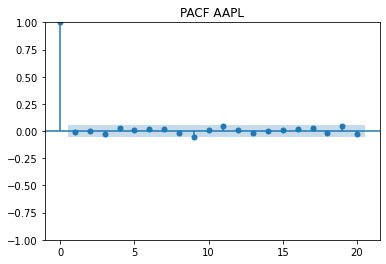

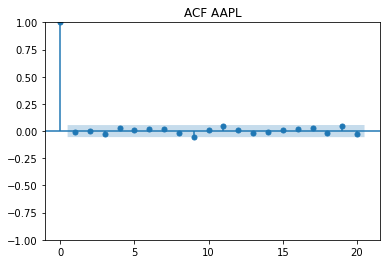

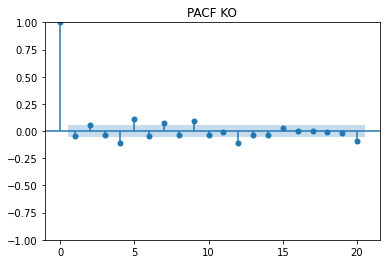

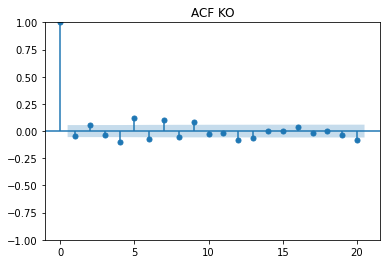

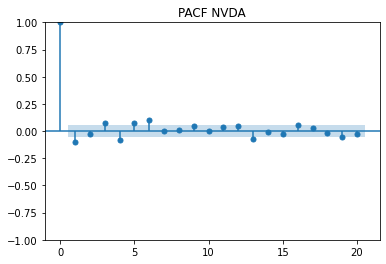

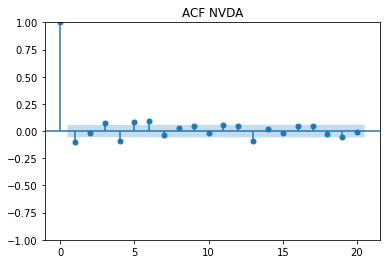

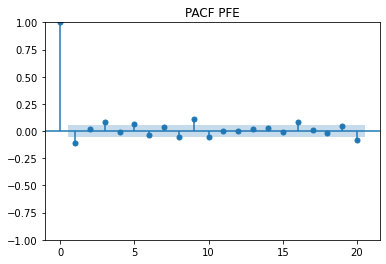

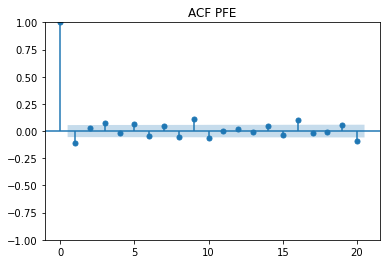

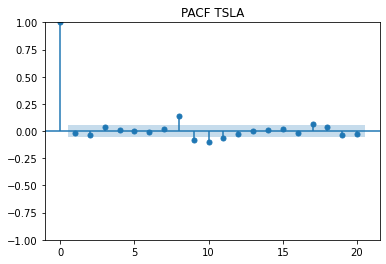

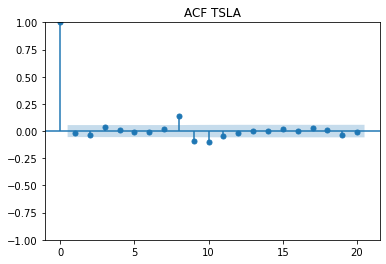

In [8]:
# 第七步：确定AR和MA的阶数-初步判断：画acf、pacf图（该种方式有时判断不出来）
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for i in range(5):
    print(tickers[i])
    pacf = plot_pacf(all_data_diff[tickers[i]], lags=20)
    plt.title('PACF '+tickers[i])
    pacf.show()

    acf = plot_acf(all_data_diff[tickers[i]], lags=20)
    plt.title('ACF '+tickers[i])
    acf.show()

# 从图中大致可以看出，p=1；q=1

In [10]:
# 第八步：使用AIC、BIC最小准则确定p、q；当p、q阶数较小时，可用这种暴力解法
import statsmodels.tsa.stattools as st
for i in range(5):
    model = st.arma_order_select_ic(all_data_diff[tickers[i]], max_ar=5, max_ma=5, ic=['aic', 'bic', 'hqic'])
    print(tickers[i], model.bic_min_order) #返回一个元组，分别为p值和q值


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmo

AAPL (0, 0)


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespa

KO (4, 1)


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmo

NVDA (2, 2)


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmo

PFE (3, 1)


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

TSLA (0, 0)


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [12]:
# 当使用data原始数据时，拟合ARIMA模型
from statsmodels.tsa.arima.model import ARIMA
model, result = {}, {}
for i in range(5):
    model[tickers[i]] = ARIMA(all_data[tickers[i]], order=(1,1,1))
    result[tickers[i]] = model[tickers[i]].fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('

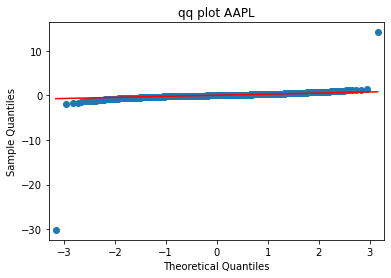

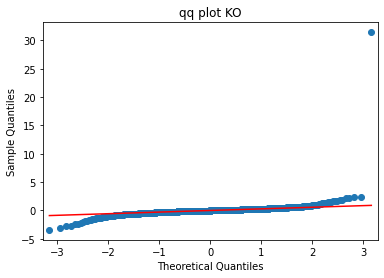

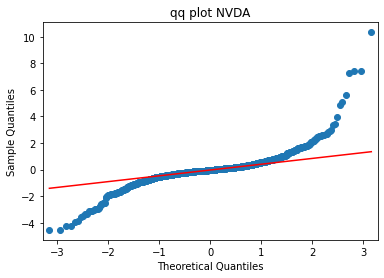

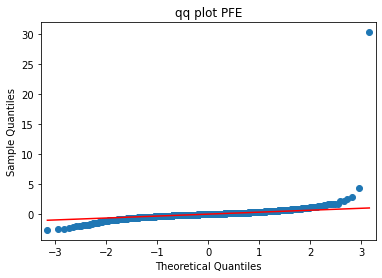

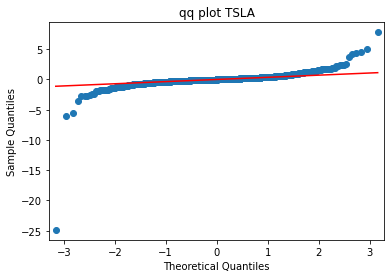

In [13]:
# 第十步：检验模型效果：残差检验
# 如果残差是白噪声序列，说明时间序列中有用的信息已经被提取完毕了，剩下的全是随机扰动，是无法预测和使用的。
# 残差序列如果通过了白噪声检验，则建模就可以终止了，因为没有信息可以继续提取。
# 如果残差如果未通过白噪声检验，说明残差中还有有用的信息，需要修改模型或者进一步提取。
from statsmodels.graphics.api import qqplot
for i in range(5):
    resid = result[tickers[i]].resid
    qqplot(resid, line='q', fit=True)
    plt.title('qq plot '+tickers[i])
    plt.show()

In [14]:
pred = {}
for i in range(5):
    pred[tickers[i]] = result[tickers[i]].predict(start=1, end =len(all_data[tickers[i]]) + 10 ) # 从训练集第0个开始预测(start=1表示从第0个开始)，预测完整个训练集后，还需要向后预测10个
    print(len(pred[tickers[i]]))
    print(tickers[i], pred[tickers[i]][-10:]) # 有负数，表明是一阶差分之后的
    # 此时可以画出预测的曲线和data_diff进行比较

1268
AAPL 1259    179.413203
1260    179.413202
1261    179.413202
1262    179.413202
1263    179.413202
1264    179.413202
1265    179.413202
1266    179.413202
1267    179.413202
1268    179.413202
Name: predicted_mean, dtype: float64
1268
KO 1259    56.279525
1260    56.275102
1261    56.279131
1262    56.275461
1263    56.278804
1264    56.275758
1265    56.278533
1266    56.276005
1267    56.278308
1268    56.276210
Name: predicted_mean, dtype: float64
1268
NVDA 1259    302.346751
1260    302.346824
1261    302.346823
1262    302.346823
1263    302.346823
1264    302.346823
1265    302.346823
1266    302.346823
1267    302.346823
1268    302.346823
Name: predicted_mean, dtype: float64
1268
PFE 1259    52.722284
1260    52.720463
1261    52.720759
1262    52.720711
1263    52.720718
1264    52.720717
1265    52.720717
1266    52.720717
1267    52.720717
1268    52.720717
Name: predicted_mean, dtype: float64
1268
TSLA 1259    1017.192591
1260    1017.351609
1261    1017.253930
1262 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Pre

In [5]:
# 第十二步：将预测的平稳值还原为非平稳序列
result_fina = {}
for i in range(5):
    result_fina[tickers[i]] = np.array(pred[tickers[i]][0:-10]) + (np.array(all_data[tickers[i]].shift(1)))
    print(result_fina[tickers[i]])

[         nan 230.3800963  231.00199181 ... 346.25470759 349.682208
 353.9290217 ]
[         nan  82.99749936  82.69590595 ... 110.30785602 109.78520168
 111.05549494]
[         nan  46.7678217   48.70803307 ... 642.07183312 629.13269434
 602.31367546]
[         nan  65.65107247  65.57701373 ... 103.03474478 103.31563838
 104.74866652]
[          nan  396.80944089  396.32200005 ... 2116.24325125 2080.32581252
 2026.07232678]


In [20]:
all_data[tickers[0]].index[-30:]

DatetimeIndex(['2021-10-29', '2021-11-01', '2021-11-02', '2021-11-03',
               '2021-11-04', '2021-11-05', '2021-11-08', '2021-11-09',
               '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-15',
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09', '2021-12-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [6]:
dates = list(all_data[tickers[0]].index[-30:])
for i in range(30):
    dates[i] = str(dates[i])[:-9]
dates

['2021-10-29',
 '2021-11-01',
 '2021-11-02',
 '2021-11-03',
 '2021-11-04',
 '2021-11-05',
 '2021-11-08',
 '2021-11-09',
 '2021-11-10',
 '2021-11-11',
 '2021-11-12',
 '2021-11-15',
 '2021-11-16',
 '2021-11-17',
 '2021-11-18',
 '2021-11-19',
 '2021-11-22',
 '2021-11-23',
 '2021-11-24',
 '2021-11-26',
 '2021-11-29',
 '2021-11-30',
 '2021-12-01',
 '2021-12-02',
 '2021-12-03',
 '2021-12-06',
 '2021-12-07',
 '2021-12-08',
 '2021-12-09',
 '2021-12-10']

In [7]:
nums = [13, 14, 15, 16, 17, 20, 21, 22, 23, 24]
for num in nums:
    dates.append(dates[29][:-2]+str(num))
dates

['2021-10-29',
 '2021-11-01',
 '2021-11-02',
 '2021-11-03',
 '2021-11-04',
 '2021-11-05',
 '2021-11-08',
 '2021-11-09',
 '2021-11-10',
 '2021-11-11',
 '2021-11-12',
 '2021-11-15',
 '2021-11-16',
 '2021-11-17',
 '2021-11-18',
 '2021-11-19',
 '2021-11-22',
 '2021-11-23',
 '2021-11-24',
 '2021-11-26',
 '2021-11-29',
 '2021-11-30',
 '2021-12-01',
 '2021-12-02',
 '2021-12-03',
 '2021-12-06',
 '2021-12-07',
 '2021-12-08',
 '2021-12-09',
 '2021-12-10',
 '2021-12-13',
 '2021-12-14',
 '2021-12-15',
 '2021-12-16',
 '2021-12-17',
 '2021-12-20',
 '2021-12-21',
 '2021-12-22',
 '2021-12-23',
 '2021-12-24']

In [36]:
str(dates[0])[:-2]
print(len(dates))

40


In [8]:
all_predict = [['date', 'stock_name', 'predict']]
for i in range(5):
    for j in range(40):
        tmp = [dates[j], tickers[i], pred[tickers[i]][1229+j]]
        all_predict.append(tmp)
all_predict

[['date', 'stock_name', 'predict'],
 ['2021-10-29', 'AAPL', 149.89089935122266],
 ['2021-11-01', 'AAPL', 148.89488332378144],
 ['2021-11-02', 'AAPL', 150.05122957339273],
 ['2021-11-03', 'AAPL', 151.44981608426792],
 ['2021-11-04', 'AAPL', 151.00514874369992],
 ['2021-11-05', 'AAPL', 151.2421346792035],
 ['2021-11-08', 'AAPL', 150.48150361147407],
 ['2021-11-09', 'AAPL', 150.77040660294588],
 ['2021-11-10', 'AAPL', 147.98653136877445],
 ['2021-11-11', 'AAPL', 147.80629336357617],
 ['2021-11-12', 'AAPL', 150.00720230405696],
 ['2021-11-15', 'AAPL', 149.99345398900505],
 ['2021-11-16', 'AAPL', 150.995877290193],
 ['2021-11-17', 'AAPL', 153.4684523567568],
 ['2021-11-18', 'AAPL', 157.84661990015977],
 ['2021-11-19', 'AAPL', 160.5610300930717],
 ['2021-11-22', 'AAPL', 161.0293634098464],
 ['2021-11-23', 'AAPL', 161.4106713020125],
 ['2021-11-24', 'AAPL', 161.94040329269913],
 ['2021-11-26', 'AAPL', 156.87853231276597],
 ['2021-11-29', 'AAPL', 160.1242392025974],
 ['2021-11-30', 'AAPL', 165

In [39]:
import csv
with open('ARIAM_result.csv', 'a', encoding='utf-8', newline='') as f:
    write = csv.writer(f)
    write.writerows(all_predict)
    f.close()

In [3]:
# 当使用data原始数据时，拟合ARIMA模型
from statsmodels.tsa.arima.model import ARIMA
model, result = {}, {}
for i in range(5):
    model[tickers[i]] = ARIMA(all_data[tickers[i]], order=(2,1,2))
    result[tickers[i]] = model[tickers[i]].fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [4]:
pred = {}
for i in range(5):
    pred[tickers[i]] = result[tickers[i]].predict(start=1, end =len(all_data[tickers[i]]) + 10 ) # 从训练集第0个开始预测(start=1表示从第0个开始)，预测完整个训练集后，还需要向后预测10个
    print(len(pred[tickers[i]]))
    print(tickers[i], pred[tickers[i]][-10:]) # 有负数，表明是一阶差分之后的
    # 此时可以画出预测的曲线和data_diff进行比较

1268
AAPL 1259    179.459969
1260    179.400374
1261    179.452910
1262    179.413921
1263    179.445813
1264    179.421144
1265    179.440843
1266    179.425397
1267    179.437635
1268    179.427996
Name: predicted_mean, dtype: float64
1268
KO 1259    56.398253
1260    56.307243
1261    56.250083
1262    56.344022
1263    56.312565
1264    56.278623
1265    56.320974
1266    56.311652
1267    56.292963
1268    56.311527
Name: predicted_mean, dtype: float64
1268
NVDA 1259    297.112207
1260    301.806843
1261    297.055357
1262    297.662657
1263    301.558887
1264    296.794656
1265    298.179889
1266    301.253146
1267    296.627789
1268    298.651695
Name: predicted_mean, dtype: float64
1268
PFE 1259    52.712951
1260    52.760728
1261    52.790643
1262    52.806737
1263    52.814841
1264    52.818787
1265    52.820673
1266    52.821564
1267    52.821983
1268    52.822179
Name: predicted_mean, dtype: float64
1268
TSLA 1259    1017.029091
1260    1010.763749
1261    1013.674426
1262 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Pre

In [9]:
import csv
with open('ARIAM_2_2result.csv', 'a', encoding='utf-8', newline='') as f:
    write = csv.writer(f)
    write.writerows(all_predict)
    f.close()